# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 12.5 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест [https://contest.yandex.ru/contest/72492] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим три простых двумерных датасета сделанных с помощью `make_moons`, `make_circles`, `make_classification` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [14]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [15]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

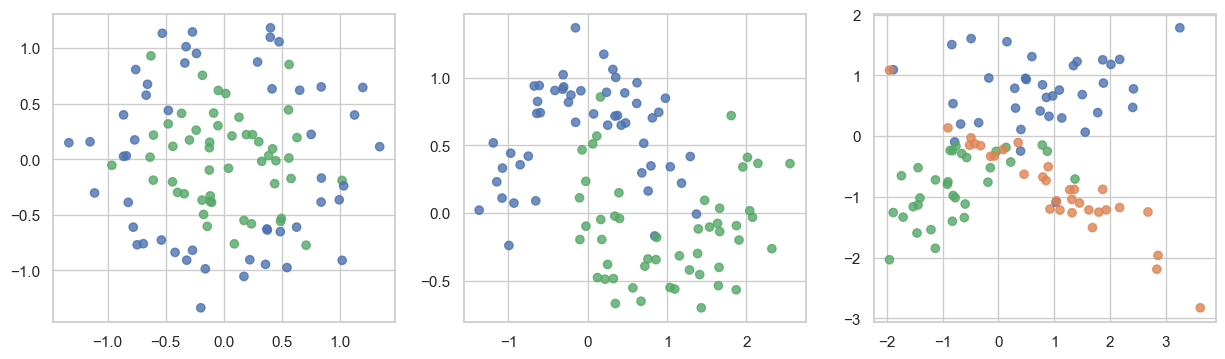

In [16]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [17]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

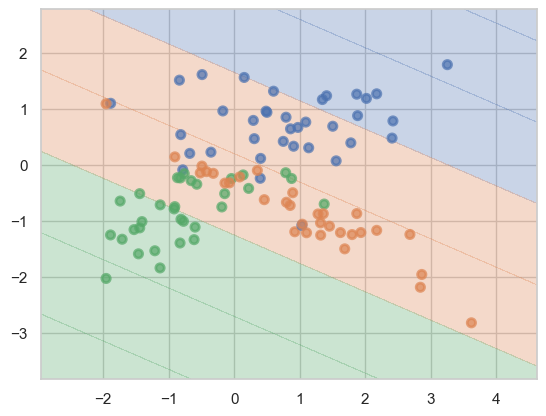

In [18]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

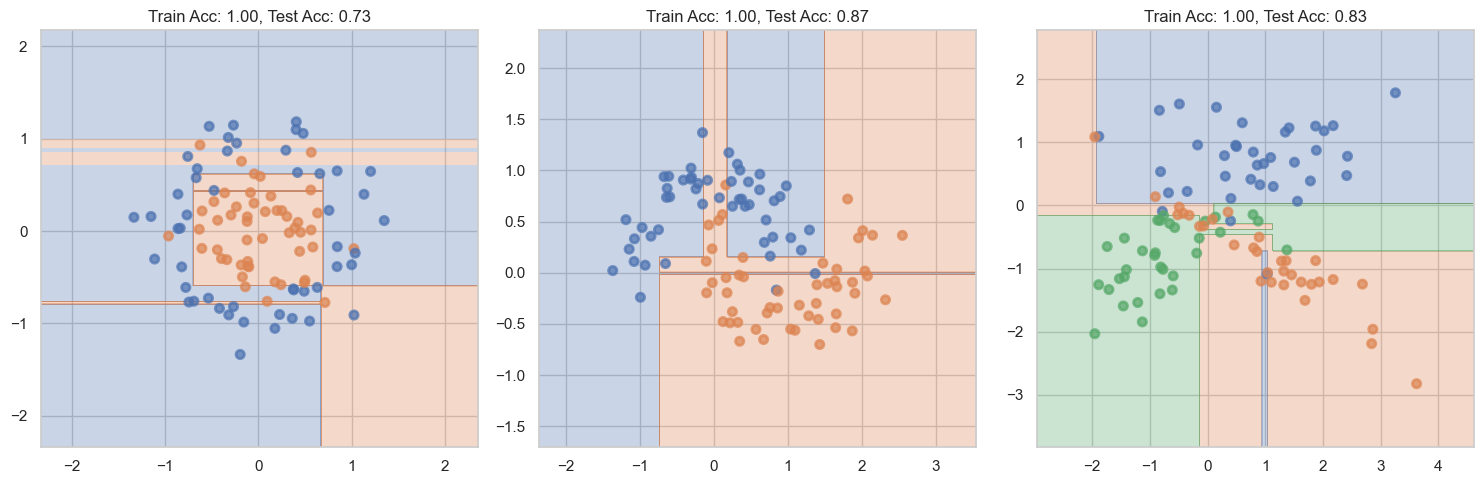

In [19]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import accuracy_score

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    ax = axes[i]
    plt.sca(ax)
    plot_surface(model, X, y)
    ax.set_title(f"Train Acc: {train_acc:.2f}, Test Acc: {test_acc:.2f}")

plt.tight_layout()
plt.show()


__Ответ:__ accuracy на тесте высокий, но деревья все равно достаточно сильно переоучились: очень много вытянутых и узких областей, которые подстраиваются под конкретные точки в выборке

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки / accuracy. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки. 

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

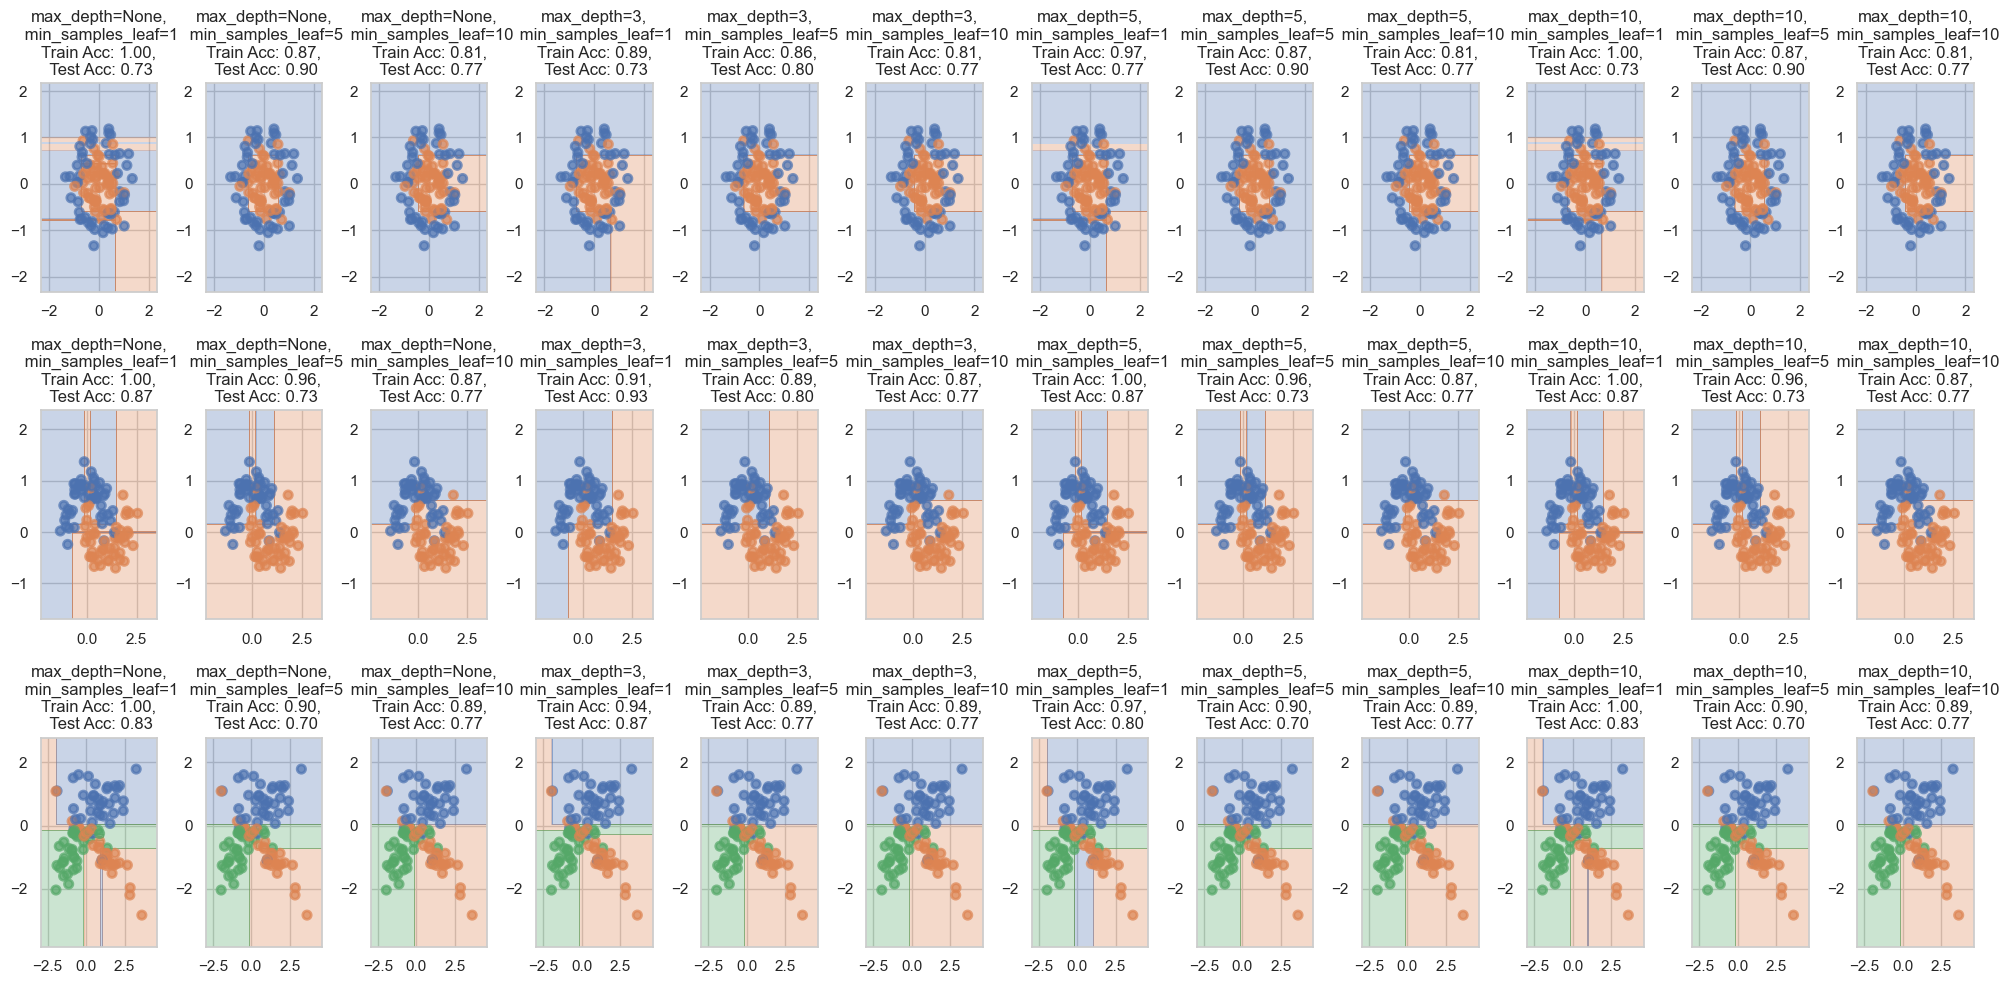

In [20]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, axes = plt.subplots(len(datasets), 12, figsize=(20, 10))

param_grid = []
for max_depth in [None, 3, 5, 10]:
    for min_samples_leaf in [1,5,10]:
        param_grid.append({"max_depth": max_depth, "min_samples_leaf": min_samples_leaf})

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    for j, params in enumerate(param_grid):
        model = DecisionTreeClassifier(random_state=42, **params)
        model.fit(X_train, y_train)

        train_acc = accuracy_score(y_train, model.predict(X_train))
        test_acc = accuracy_score(y_test, model.predict(X_test))

        ax = axes[i, j]
        plt.sca(ax)
        plot_surface(model, X, y)
        ax.set_title(f"max_depth={params['max_depth']},\n min_samples_leaf={params['min_samples_leaf']}\n"
                     f"Train Acc: {train_acc:.2f},\n Test Acc: {test_acc:.2f}")

plt.tight_layout()
plt.show()

__Ответ:__ При увеличении max_depth accuracy на трейне растет, а на тесте падает, то есть дерево переобучается, также это можно заметрить по разделяющим поверхностям. При увеличении min_samples_leaf в листе особо не влияет на accuracy, но разбиение становится лучше, что хорошо сказывается на обобщающей способности модели

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

indobin@edu.hse.ru

https://contest.yandex.ru/contest/72492/run-report/129704150/

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

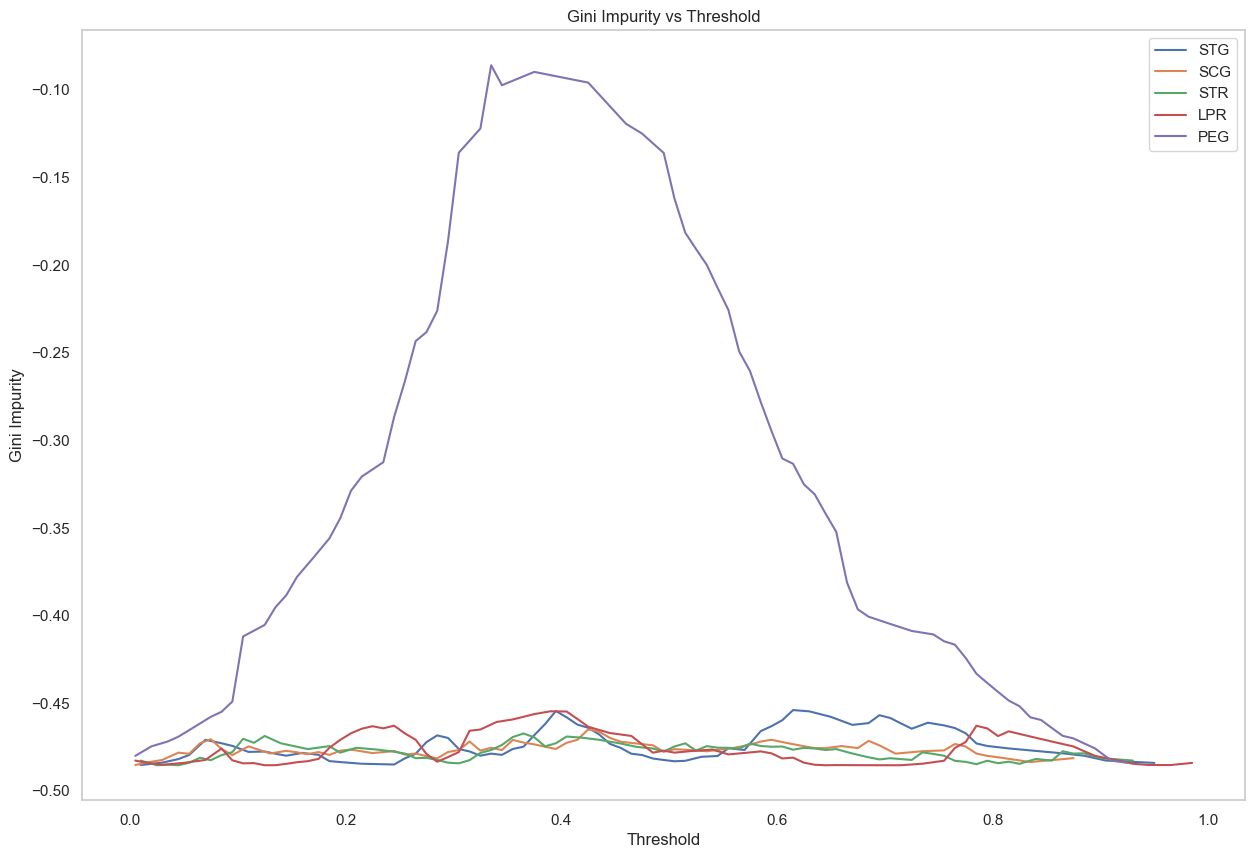

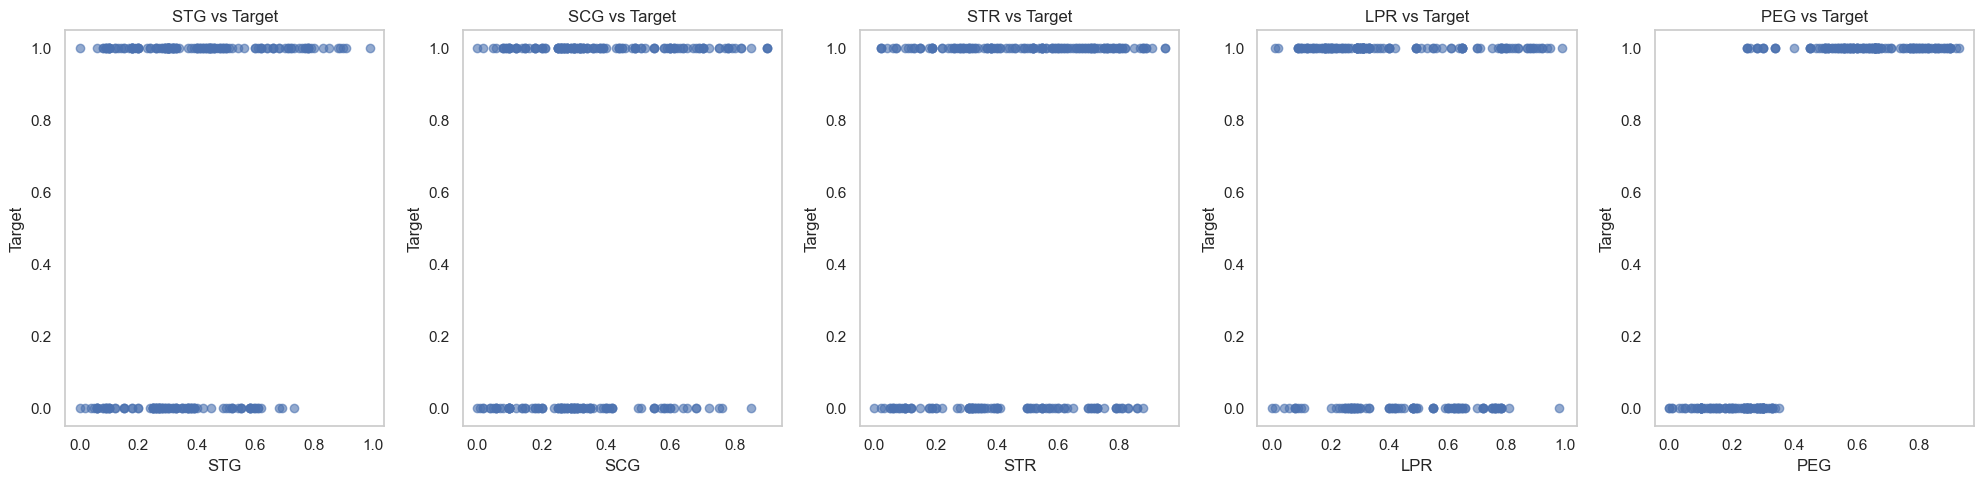

In [21]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from hw5code import *
students = pd.read_csv("students.csv")
features = students.columns[:-1]
target = students.columns[-1]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    feature_vector = students[feature].values
    target_vector = students[target].values
    thresholds, ginis, _, _ = find_best_split(feature_vector, target_vector)
    plt.plot(thresholds, ginis, label=f"{feature}")

plt.title("Gini Impurity vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Gini Impurity")
plt.legend()
plt.grid()
plt.show()

fig, axes = plt.subplots(1, len(features), figsize=(20, 5))
for i, feature in enumerate(features):
    axes[i].scatter(students[feature], students[target], alpha=0.6)
    axes[i].set_title(f"{feature} vs Target")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Target")
    axes[i].grid()

plt.tight_layout()
plt.show()


__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Максимум критерия Джинни достигается в PEG, поэтому разделение лучше всего делать по PEG. Выборка делится почти идеально, когда есть такой порог, при котором в один лист идет почти полностью один класс, а в другую другой. В таком случае значение Джини критерия будет около 0, а кривая имела бы ярковыраженный максимум и была бы горообразной. На диаграмме рассеивания хорошо видно, что можно поделить значения на две части, в каждой из которых будут значительно преобладать объекты опредленного класса - например, PEG. Деление практически невозможно в том случае, когда на диаграмме рассеивания классы объектов постоянно чередуются и нельзя нормально разделить выборки на две части, из-за чего кривая не имеет ярковыраженных максимумов и вообще похоже на зашумленную горизонтальную прямую

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

https://contest.yandex.ru/contest/72492/run-report/129706300/

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [22]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

df = pd.read_csv("agaricus-lepiota.data")
df = df.apply(LabelEncoder().fit_transform)
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
feature_types = ["categorical"] * X.shape[1]
clf = DecisionTree(feature_types=feature_types, max_depth=None, min_samples_split=2, min_samples_leaf=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 1.0000


__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (https://github.com/esokolov/ml-course-hse/blob/master/2024-fall/homework-practice/homework-practice-05-trees/tic-tac-toe-endgame.csv).

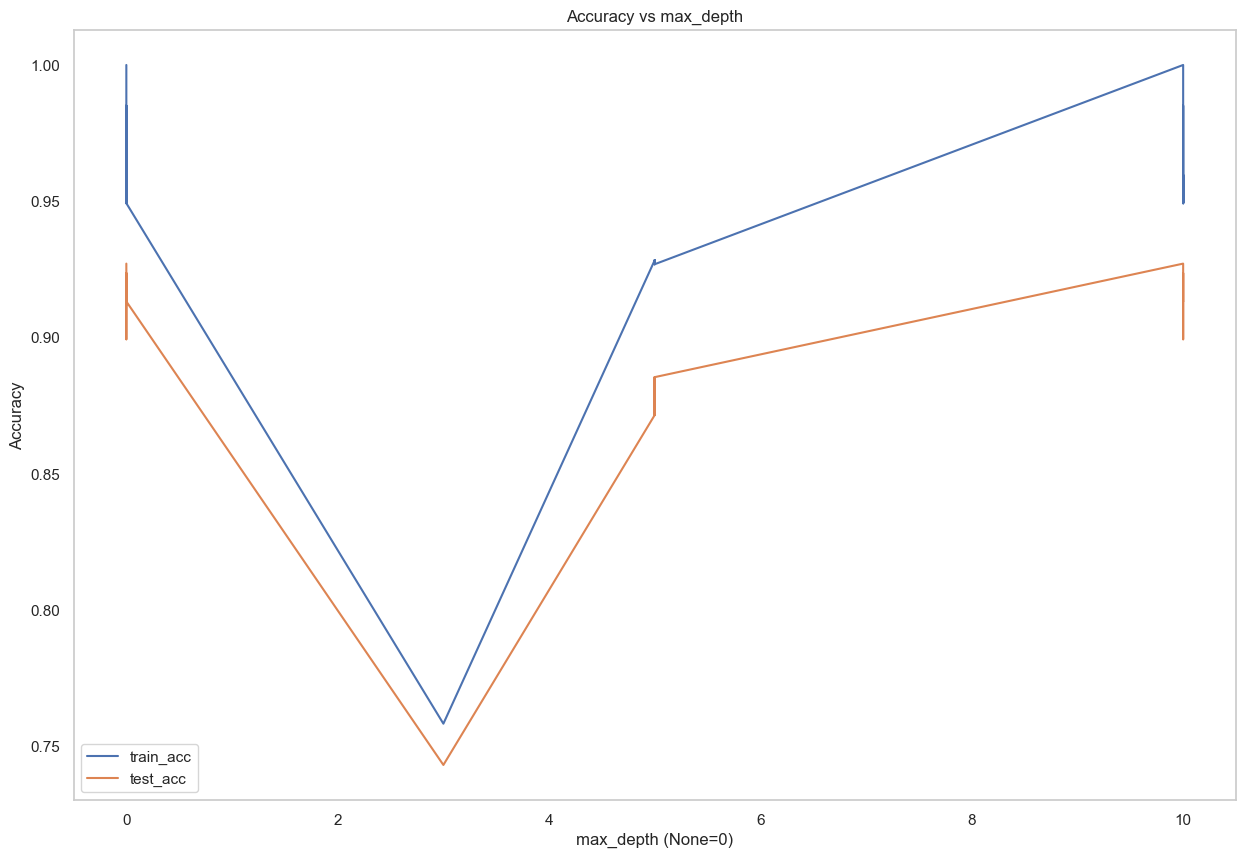

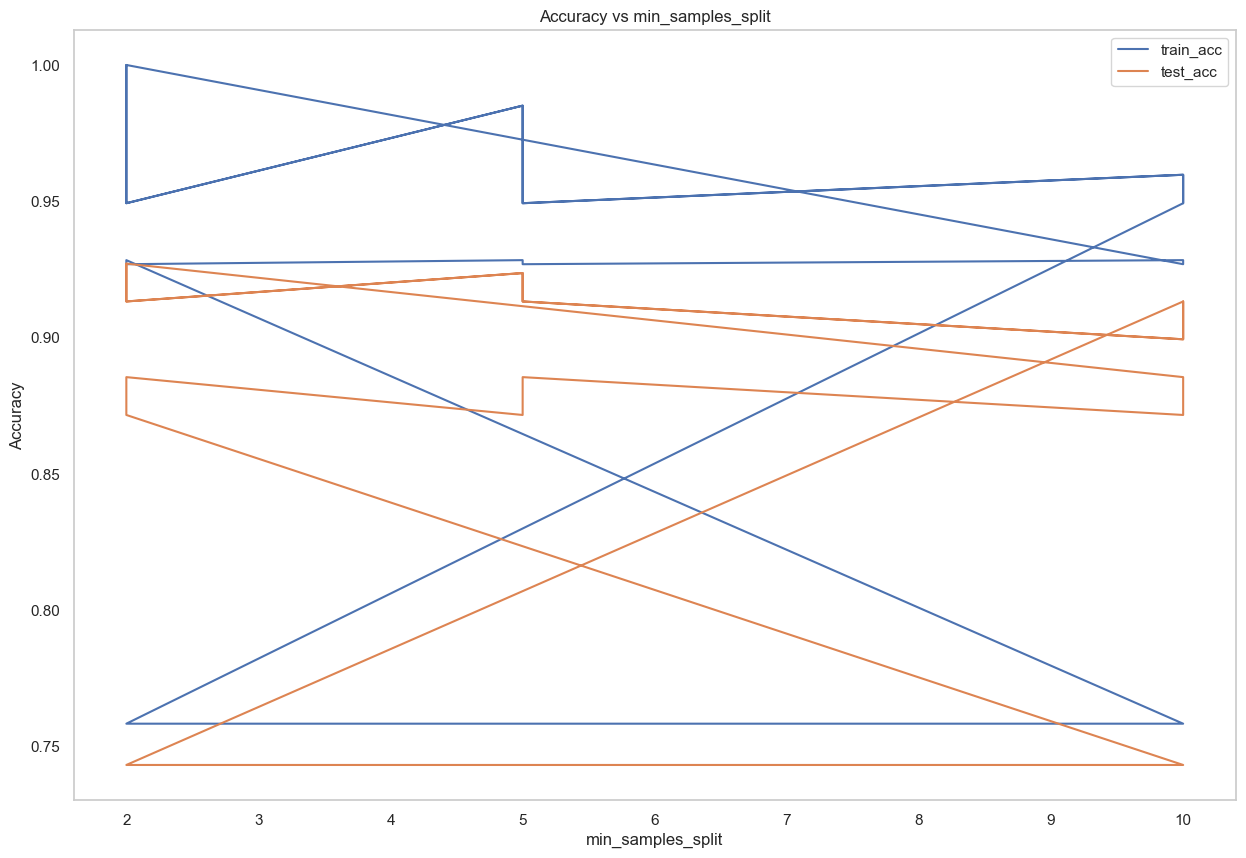

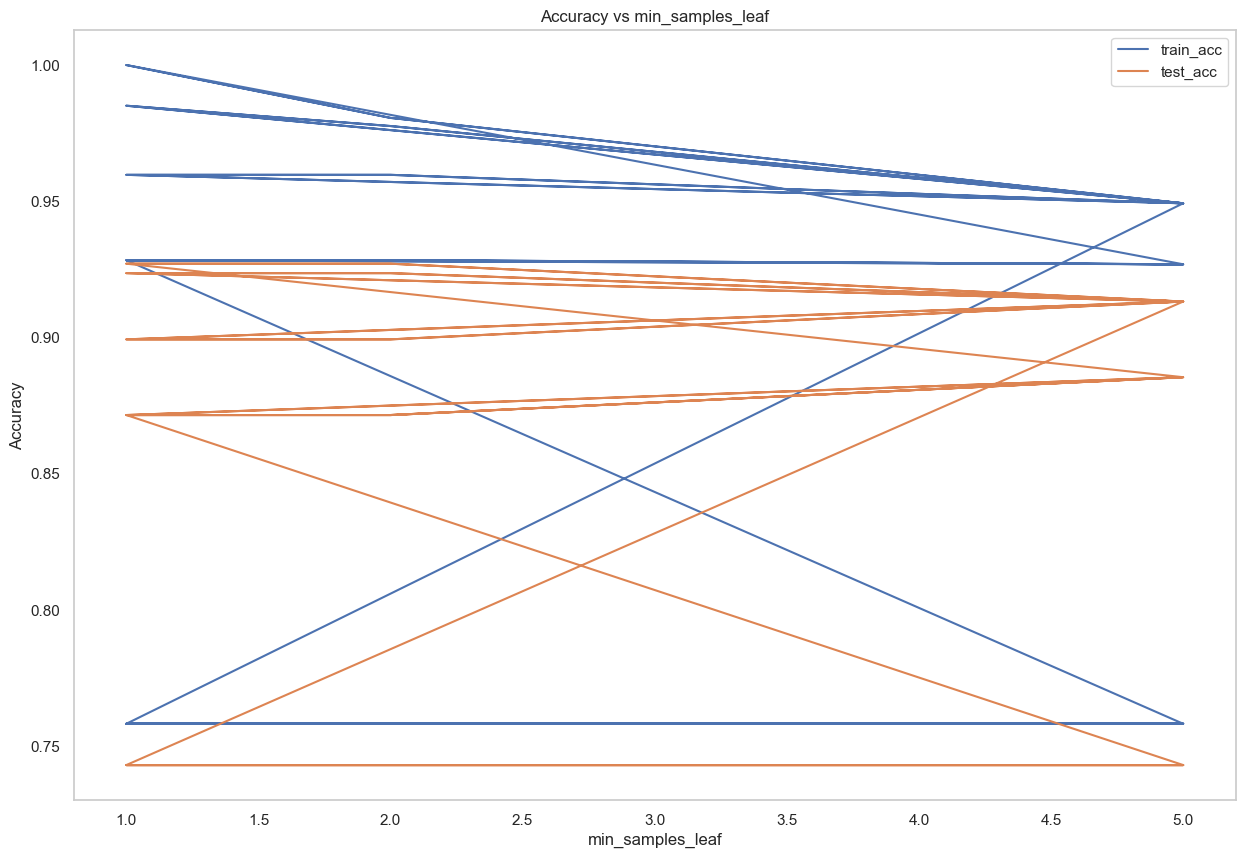

In [23]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = pd.read_csv("tic-tac-toe-endgame.csv")
encoder = LabelEncoder()
for column in df.columns:
    df[column] = encoder.fit_transform(df[column])
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
feature_types = ["categorical"] * X.shape[1]

max_depths = [None, 3, 5, 10]
min_samples_splits = [2, 5, 10]
min_samples_leafs = [1, 2, 5]
results = []

for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        for min_samples_leaf in min_samples_leafs:
            clf = DecisionTree(
                feature_types=feature_types,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf
            )
            clf.fit(X_train, y_train)
            train_acc = accuracy_score(y_train, clf.predict(X_train))
            test_acc = accuracy_score(y_test, clf.predict(X_test))
            results.append({
                "max_depth": max_depth,
                "min_samples_split": min_samples_split,
                "min_samples_leaf": min_samples_leaf,
                "train_acc": train_acc,
                "test_acc": test_acc
            })


def plot_metric_vs_param(results, param_name, metric_names):
    plt.figure(figsize=(15, 10))
    for metric in metric_names:
        plt.plot(
            [r[param_name] if param_name != "max_depth" or r[param_name] is not None else 0 for r in results],
            [r[metric] for r in results],
            label=f"{metric}"
        )
    
    plt.title(f"Accuracy vs {param_name}")
    plt.xlabel(param_name if param_name != "max_depth" else f"{param_name} (None=0)")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

plot_metric_vs_param(results, "max_depth", ["train_acc", "test_acc"])
plot_metric_vs_param(results, "min_samples_split", ["train_acc", "test_acc"])
plot_metric_vs_param(results, "min_samples_leaf", ["train_acc", "test_acc"])

__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Перебираете все пороги
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения: $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} + \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

Лучшие параметры для LinearRegressionTree: {'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 5}
MSE LinearRegressionTree: 0.3444794799110643
Лучшие параметры для DecisionTreeRegressor: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 5}
MSE DecisionTreeRegressor: 0.5211334618725707


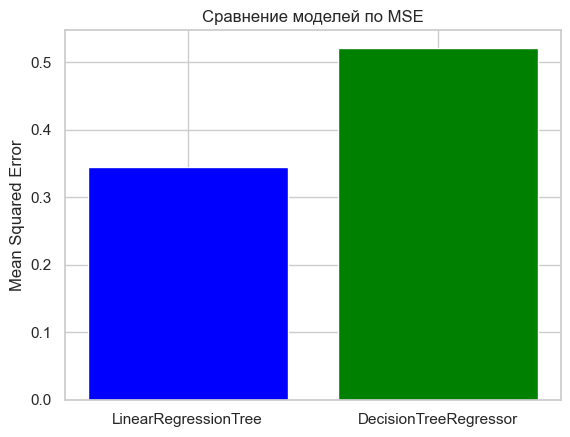

In [24]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

california = fetch_california_housing()
X, y = california.data, california.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
feature_types = ["real"] * X.shape[1]
linear_tree_params = {
    "max_depth": [3, 5],
    "min_samples_split": [5],
    "min_samples_leaf": [5],
}
best_linear_tree = None
best_linear_params = None
best_linear_mse = float('inf')

for max_depth in linear_tree_params["max_depth"]:
    for min_samples_split in linear_tree_params["min_samples_split"]:
        for min_samples_leaf in linear_tree_params["min_samples_leaf"]:
            tree = LinearRegressionTree(
                feature_types=feature_types,
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf
            )
            tree.fit(X_train, y_train)
            y_pred = tree.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)

            if mse < best_linear_mse:
                best_linear_mse = mse
                best_linear_tree = tree
                best_linear_params = {
                    "max_depth": max_depth,
                    "min_samples_split": min_samples_split,
                    "min_samples_leaf": min_samples_leaf,
                }
                
param_grid = {
    "max_depth": [3, 5],
    "min_samples_split": [5],
    "min_samples_leaf": [5],
}
regressor = GridSearchCV(DecisionTreeRegressor(), param_grid, scoring="neg_mean_squared_error", cv=3)
regressor.fit(X_train, y_train)
best_sklearn_params = regressor.best_params_
best_sklearn_model = regressor.best_estimator_
linear_tree_mse = mean_squared_error(y_test, best_linear_tree.predict(X_test))
sklearn_tree_mse = mean_squared_error(y_test, best_sklearn_model.predict(X_test))

print("Лучшие параметры для LinearRegressionTree:", best_linear_params)
print("MSE LinearRegressionTree:", linear_tree_mse)
print("Лучшие параметры для DecisionTreeRegressor:", best_sklearn_params)
print("MSE DecisionTreeRegressor:", sklearn_tree_mse)

labels = ["LinearRegressionTree", "DecisionTreeRegressor"]
mse_values = [linear_tree_mse, sklearn_tree_mse]

plt.bar(labels, mse_values, color=["blue", "green"])
plt.title("Сравнение моделей по MSE")
plt.ylabel("Mean Squared Error")
plt.show()


у меня к сожалению не хватило времени на то, чтобы код отработал с большой параметрической сеткой, поэтому сократил количество значений.

Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

Напишите, какие достоинства и недостатки вы видите у реализованного вами линейного дерева.

Линейное дерево работает лучше решающего.

In [25]:
n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))

# YOUR CODE

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания:

# владик апрелишевич бэстик